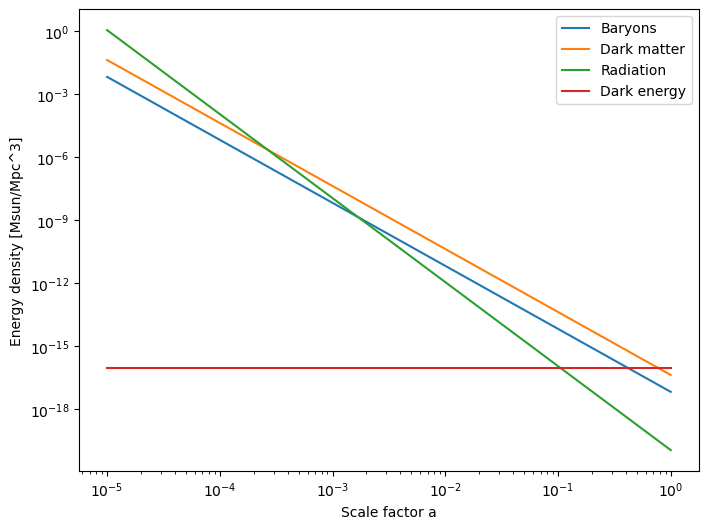

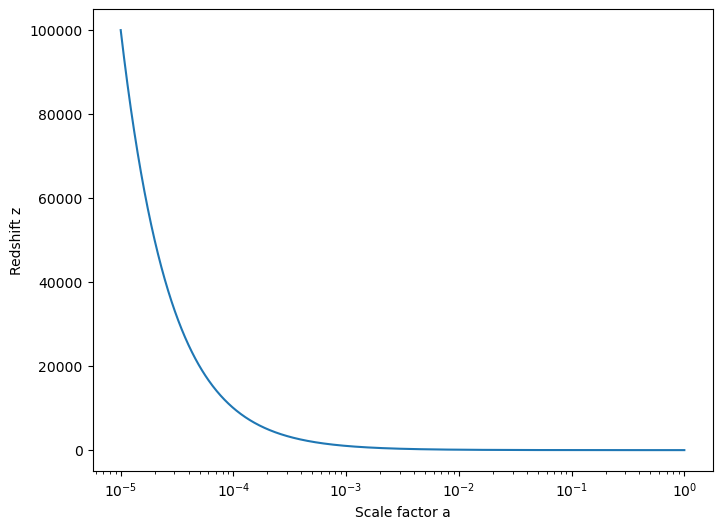

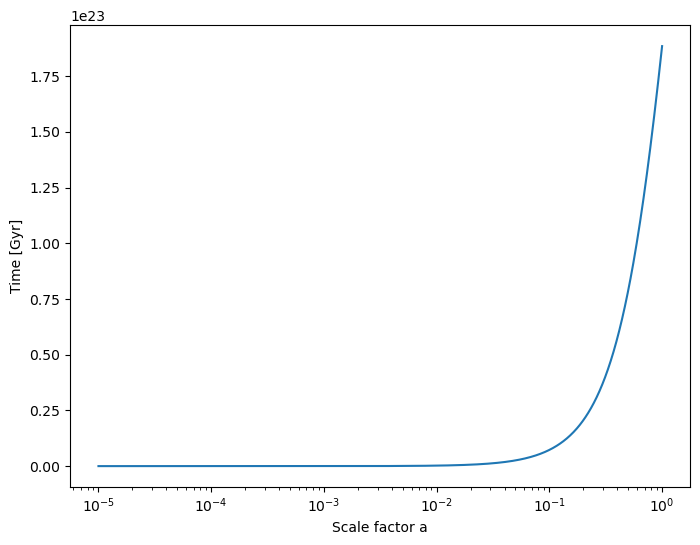

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define cosmological parameters
H0 = 67.66       # Hubble constant in km/s/Mpc
Omegab = 0.049  # Baryonic matter density parameter
Omegac = 0.3111  # Cold dark matter density parameter
OmegaR = 8.24e-5 # Radiation density parameter
Omega_L = 0.689  # Dark energy density parameter
Tcmb0 = 2.7255   # CMB temperature today in K

# Convert H0 to units of 1/s
H0 = H0 / (3.086e19 / 1e6)

# Compute critical density today in Msun/Mpc^3
rhoc = (3 * H0**2) / (8 * np.pi * 4.3e-9)

# Define range of scale factor values
a = np.logspace(-5, 0, 1000)

# Compute energy density of different components as a function of a
rho_b = rhoc * Omegab * a**-3
rho_c = rhoc * Omegac * a**-3
rho_r = rhoc * OmegaR * a**-4
rho_l = rhoc * Omega_L * np.ones_like(a)

# Compute redshift as a function of scale factor
z = 1 / a - 1

# Compute time as a function of scale factor
t = np.zeros_like(a)
for i in range(1, len(a)):
    integrand = lambda x: 1 / (x * H0 * np.sqrt(Omegab * x**-3 + Omegac * x**-3 + OmegaR * x**-4 + Omega_L))
    t[i] = t[i-1] + (1 / H0) * quad(integrand, a[i-1], a[i])[0]

# Make plots
plt.figure(figsize=(8,6))
plt.loglog(a, rho_b, label='Baryons')
plt.loglog(a, rho_c, label='Dark matter')
plt.loglog(a, rho_r, label='Radiation')
plt.loglog(a, rho_l, label='Dark energy')
plt.xlabel('Scale factor a')
plt.ylabel('Energy density [Msun/Mpc^3]')
plt.legend()

plt.figure(figsize=(8,6))
plt.semilogx(a, z)
plt.xlabel('Scale factor a')
plt.ylabel('Redshift z')

plt.figure(figsize=(8,6))
plt.semilogx(a, t)
plt.xlabel('Scale factor a')
plt.ylabel('Time [Gyr]')

plt.show()


C:\Users\eduar\AppData\Local\Temp\ipykernel_11864\3129659464.py:30: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  proper_distance_vals.append(quad(integrand_proper, 0, a_arr[i])[0])


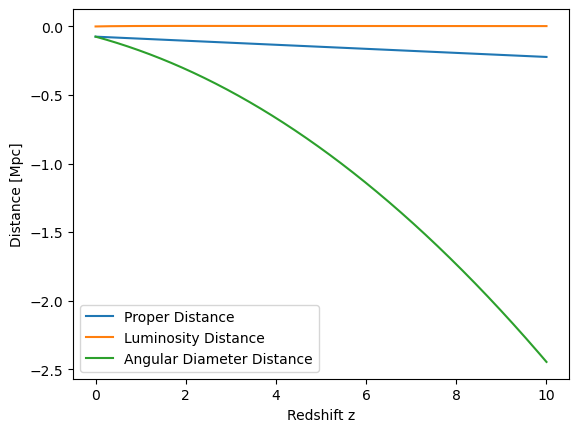

In [12]:
import numpy as np
from scipy.integrate import quad

# Cosmological parameters
H_0 = 67.36        # km/s/Mpc
Omega_m = 0.315    # matter density parameter
Omega_r = 9.24e-5  # radiation density parameter
Omega_l = 0.685    # dark energy density parameter

# Define the Hubble parameter as a function of redshift
def H(z):
    return H_0 * np.sqrt(Omega_m * (1 + z)**3 + Omega_r * (1 + z)**4 + Omega_l)

# Define the integrands for proper distance, luminosity distance, and angular diameter distance
def integrand_proper(a):
    return 1.0 / (a**2 * H(a))

def integrand_luminosity(a):
    return 1.0 / (a * H(a))

# Define an array of redshift values
z_arr = np.linspace(0, 10, 1000)

# Compute the scale factor at each redshift
a_arr = 1 / (1 + z_arr)

# Compute the proper distance at each redshift
proper_distance_vals = []
for i in range(len(z_arr)):
    proper_distance_vals.append(quad(integrand_proper, 0, a_arr[i])[0])

# Compute the luminosity distance at each redshift
luminosity_distance_vals = []
for i in range(len(z_arr)):
    luminosity_distance_vals.append(a_arr[i] * quad(integrand_luminosity, a_arr[i], 1)[0])

# Compute the angular diameter distance at each redshift
angular_diameter_distance_vals = proper_distance_vals / a_arr

# Plot the distances as a function of redshift
import matplotlib.pyplot as plt

plt.plot(z_arr, proper_distance_vals, label='Proper Distance')
plt.plot(z_arr, luminosity_distance_vals, label='Luminosity Distance')
plt.plot(z_arr, angular_diameter_distance_vals, label='Angular Diameter Distance')
plt.legend()
plt.xlabel('Redshift z')
plt.ylabel('Distance [Mpc]')
plt.show()


In [13]:
import numpy as np

# Compute the distance modulus using the luminosity distance
d_L = 10.0 # example value in Mpc
mu = 5.0 * np.log10(d_L/1.0) + 25.0
print(mu)


30.0
